### 데이터 불러오기 및 컬럼 정리

In [36]:
df12 = pd.read_csv("final_df_12.csv", index_col=0)

In [37]:
X_train = pd.read_csv("X_train12.csv", index_col=0)
X_test = pd.read_csv("X_test12.csv", index_col=0)
y_train = pd.read_csv("y_train12.csv", index_col=0)
y_test = pd.read_csv("y_test12.csv", index_col=0)

In [38]:
X_train.drop(columns=['rev_nationwide', 'rev_seoul', 'rev_seoul.1', 'release', 'form', 'realease_year'], axis=1, inplace=True)
X_train.columns

Index(['title', 'director', 'distributor', 'distributor_group', 'release_date',
       'release_season', 'nation', 'screen', 'genre', 'rate', 'type',
       'expert_rating', 'starring_actors', 'running_times', 'audience_rating',
       'rating_audiences', 'director_power', 'sequel', 'original',
       'actor_power', 'director_count', 'director_movie_count',
       'actor_movie_count', 'before_news', 'after_news'],
      dtype='object')

In [39]:
X_test.drop(columns=['rev_nationwide', 'rev_seoul', 'rev_seoul.1', 'release', 'form', 'realease_year'], axis=1, inplace=True)
X_test.columns

Index(['title', 'director', 'distributor', 'distributor_group', 'release_date',
       'release_season', 'nation', 'screen', 'genre', 'rate', 'type',
       'expert_rating', 'starring_actors', 'running_times', 'audience_rating',
       'rating_audiences', 'director_power', 'sequel', 'original',
       'actor_power', 'director_count', 'director_movie_count',
       'actor_movie_count', 'before_news', 'after_news'],
      dtype='object')

### df 배급사 A, B, C로 구분

In [114]:
group_a = ['씨제이이앤엠(주)', '메가박스중앙(주)플러스엠', 'CGV아트하우스', '롯데쇼핑㈜롯데엔터테인먼트',
       'CGV아트하우스,(주)대명문화공장', '롯데쇼핑㈜롯데엔터테인먼트,(주)마인스 엔터테인먼트',
       'CGV아트하우스,(주)리틀빅픽쳐스', 'CGV아트하우스,영화사 풀', '메가박스중앙(주)플러스엠,(주)키위미디어그룹',
       '롯데쇼핑㈜롯데엔터테인먼트,(주)리틀빅픽쳐스', '메가박스중앙(주)플러스엠,주식회사 키위컴퍼니',
       '씨제이 씨지브이(CJ CGV)(주)', '롯데컬처웍스(주)롯데엔터테인먼트',
       '롯데컬처웍스(주)롯데엔터테인먼트,씨네그루(주)키다리이엔티', '메가박스중앙(주)플러스엠,(주)콘텐츠 난다긴다',
       '씨제이이앤엠(주),(주)덱스터스튜디오', '(주)쇼박스', '(주)넥스트엔터테인먼트월드(NEW)', '(주)쇼박스,(주)와우픽쳐스',
       '(주)넥스트엔터테인먼트월드(NEW),(주)팬엔터테인먼트']
group_b = ['월트디즈니컴퍼니코리아(주)', '이십세기폭스코리아(주)', '유니버설픽쳐스인터내셔널 코리아(유)',
       '워너브러더스 코리아(주)', '씨네그루(주)다우기술', '(주)이수C&E', '(주)티캐스트',
       '씨네그루(주)키다리이엔티', '월트디즈니컴퍼니코리아 유한책임회사', '소니픽쳐스엔터테인먼트코리아주식회사극장배급지점',
       '(주)이수C&E,(주)스톰픽쳐스코리아', '씨네그루(주)키다리이엔티,주식회사 키위컴퍼니',
       '(주)이수C&E,(주)에이원엔터테인먼트', '씨네그루(주)키다리이엔티,(주)삼백상회',
       '(주)이수C&E,(주)시너지미디어', '(주)셀트리온엔터테인먼트', '케이티하이텔(주)']

In [115]:
df12['distributor_group'] = df12['distributor']
df12['distributor_group'].unique()

array(['월트디즈니컴퍼니코리아(주)', '씨제이이앤엠(주)', '이십세기폭스코리아(주)',
       '유니버설픽쳐스인터내셔널 코리아(유)', '(주)쇼박스', '워너브러더스 코리아(주)',
       '(주)넥스트엔터테인먼트월드(NEW)', '메가박스중앙(주)플러스엠', 'CGV아트하우스',
       '롯데쇼핑㈜롯데엔터테인먼트', 'CGV아트하우스,(주)대명문화공장', '씨네그루(주)다우기술',
       '롯데쇼핑㈜롯데엔터테인먼트,(주)마인스 엔터테인먼트', '(주)리틀빅픽쳐스,(주)이수C&E', '(주)박수엔터테인먼트',
       '(주)시네마서비스', '(주)리틀빅픽쳐스,(주)대명문화공장', '(주)와우픽쳐스,(주)쇼박스', '판씨네마(주)',
       '에이원엔터테인먼트', '(주)영화사 진진', '(주)이수C&E', '(주)리틀빅픽쳐스',
       '(주)제이앤씨미디어그룹,(주)나이너스엔터테인먼트', '(주)쇼박스,(주)와우픽쳐스', '그린나래미디어(주)',
       '(주)영화사 빅', '(주)나이너스엔터테인먼트', '(유)조이앤시네마', '(주)브리즈픽처스,(주)영화사오원',
       '(주)스톰픽쳐스코리아', '와이드 릴리즈(주)', '(주)팝엔터테인먼트',
       '(주)대명문화공장,(주)나이너스엔터테인먼트', '(주)인벤트스톤', 'CGV아트하우스,(주)리틀빅픽쳐스',
       '(주)와우픽쳐스', '주식회사 마운틴픽쳐스', '필라멘트픽쳐스', '(주)스마일이엔티,(주)영화사오원',
       '㈜코리아스크린,와이드 릴리즈(주)', '(주)영화제작전원사 ,(주)넥스트엔터테인먼트월드(NEW)',
       '(주)리틀빅픽쳐스,(주)인벤트스톤', '(주)스톰픽쳐스코리아,주식회사 우리네트웍스', '(주)라이크 콘텐츠',
       '(주)나이너스엔터테인먼트,(주)지어소프트', '(주)영화사오원,(주)브리즈픽처스', '예지림엔터테인먼트',
       '(주)엣나인필름', '(주)티캐스트', 'TCO(

In [116]:
for a in group_a:
    df12['distributor_group'] = df12['distributor_group'].replace(a, 'A')

for b in group_b:
    df12['distributor_group'] = df12['distributor_group'].replace(b, 'B')
    
df12['distributor_group'] = df12['distributor_group'].apply(lambda data : "C" if data != 'A' and data != 'B' else data)

In [117]:
df12['distributor_group'].unique()

array(['B', 'A', 'C'], dtype=object)

### 상관관계 확인
- 개봉일을 요일로 변환
    - 영화는 주로 수요일 목요일에 개봉 
    - cf) 문화의 날 : 매달 마지막주 수요일부터 주말까지 오후 5시부터 9시까지 5000원에 영화를 관람할 수 있다.
    - 화요일에 개봉한 영화는 26편이지만 평균 관객수가 수요일보다 많음
        - 화요일에 알짜배기 영화가 많이 개봉했다. 
        - 배급사파워? 목요일에 비해 스크린 많이 차지함
        - expert_rating, audience_rating 다 높은 편
        - 참고) https://www.sedaily.com/Photo/NewsView/1VKLUJ3G14
- 개봉일을 휴일 여부로 구분하고 배급사랑 상호작용해보면 어떨까?

In [118]:
# 개봉일을 요일로 변환
type(df12['release_date'])

pandas.core.series.Series

In [119]:
dates = list(df12['release_date'].values)
type(dates)

list

In [120]:
import datetime

tmp = []
for date in dates:
    tmp.append(datetime.datetime.strptime(date, '%m/%d/%Y'))

In [121]:
t = ['월', '화', '수', '목', '금', '토', '일']
t[tmp[0].weekday()]

'목'

In [122]:
t = ['월', '화', '수', '목', '금', '토', '일']
tmp_d = []
for day in tmp:
    tmp_d.append(t[day.weekday()])

In [123]:
df12['day'] = tmp_d
df12.columns

Index(['title', 'director', 'distributor', 'distributor_group', 'release_date',
       'release_season', 'release', 'form', 'nation', 'screen',
       'rev_nationwide', 'aud_nationwide', 'rev_seoul', 'rev_seoul.1', 'genre',
       'rate', 'type', 'expert_rating', 'starring_actors', 'running_times',
       'audience_rating', 'rating_audiences', 'realease_year',
       'director_power', 'sequel', 'original', 'actor_power', 'director_count',
       'director_movie_count', 'actor_movie_count', 'log_aud', 'before_news',
       'after_news', 'day', 'count'],
      dtype='object')

In [124]:
df12['count'] = 1

In [125]:
day_df = df12.groupby('day').sum()

In [126]:
day_df.reset_index(inplace=True)

In [127]:
day_df

,day,screen,rev_nationwide,aud_nationwide,rev_seoul,rev_seoul.1,expert_rating,running_times,audience_rating,rating_audiences,...,sequel,original,actor_power,director_count,director_movie_count,actor_movie_count,log_aud,before_news,after_news,count
0,금,921,5.023575e+09,645208,976077200,120389,10.50,180,18.264690,779,...,1,1,54450,2,0,1,25.256024,228.0,187.0,2
1,목,193592,2.252222e+12,277657409,634303641043,74747004,2090.56,42611,3227.484494,154390,...,186,102,2899698400,437,242,2111,4934.556362,106481.0,113695.0,400
2,수,352561,5.703639e+12,696558073,1510130492942,176963342,2747.15,55592,4081.721620,447672,...,217,168,6055460119,533,304,3346,6466.204111,214750.0,228293.0,494
3,토,1162,1.103567e+10,1408143,3935308236,484857,6.50,253,17.331489,1482,...,3,2,12029637,3,3,28,36.131203,74.0,433.0,3
4,화,20668,3.405857e+11,40696355,89715335673,10307038,140.97,2909,209.635991,18637,...,13,12,354191747,28,17,235,346.401693,8292.0,10626.0,26


In [128]:
tmp_df = df12.groupby('day').sum()
day_avg_df = tmp_df['aud_nationwide'] / tmp_df['count']
day_avg_df = pd.DataFrame(day_avg_df)
day_avg_df

,0
day,
금,3.226040e+05
목,6.941435e+05
수,1.410037e+06
토,4.693810e+05
화,1.565244e+06


In [129]:
day_avg_df.reset_index(inplace=True)

In [130]:
day_avg_df.rename(columns={0: 'avg_audiences'}, inplace=True)

In [131]:
day_avg_df

,day,avg_audiences
0,금,3.226040e+05
1,목,6.941435e+05
2,수,1.410037e+06
3,토,4.693810e+05
4,화,1.565244e+06


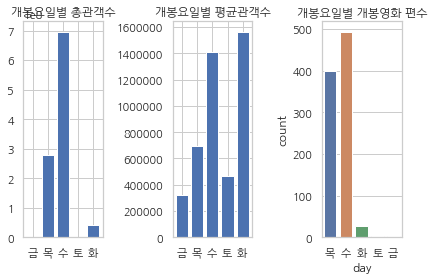

In [132]:
plt.subplot(131)
plt.bar(x='day', height='aud_nationwide', data=day_df)
plt.title("개봉요일별 총관객수")

plt.subplot(132)
plt.bar(x='day', height='avg_audiences', data=day_avg_df)
plt.title("개봉요일별 평균관객수")

plt.subplot(133)
sns.countplot(x='day', data=df12)
plt.title("개봉요일별 개봉영화 편수")
plt.tight_layout()
plt.show()

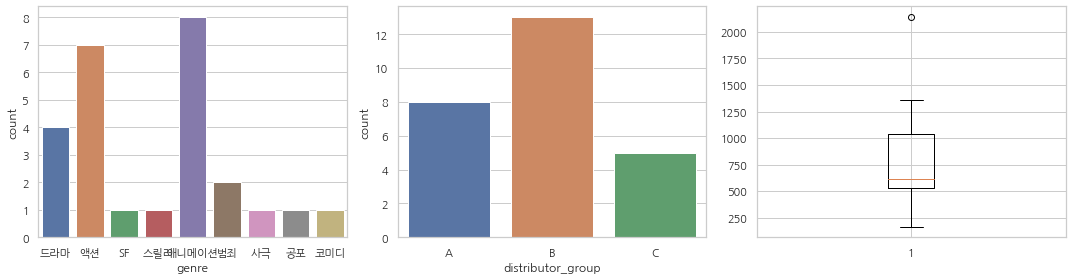

In [138]:
plt.figure(figsize=(15, 4))
plt.subplot(131)
sns.countplot(x=df12[df12['day'] == '화']['genre'], data=df12)

plt.subplot(132)
sns.countplot(x=df12[df12['day'] == '화']['distributor_group'], data=df12)

plt.subplot(133)
plt.boxplot(x=df12[df12['day'] == '화']['screen'], data=df12)

plt.tight_layout()
plt.show()

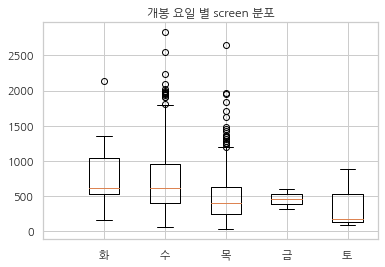

In [134]:
# 요일별로 screen 박스플랏 그려보기
fig, ax = plt.subplots()
ax.boxplot([df12[df12['day'] == '화']['screen'], df12[df12['day'] == '수']['screen'], 
            df12[df12['day'] == '목']['screen'], df12[df12['day'] == '금']['screen'], 
            df12[df12['day'] == '토']['screen']])
plt.title("개봉 요일 별 screen 분포")
plt.xticks(range(6), ['', '화', '수', '목', '금', '토'])
plt.show()

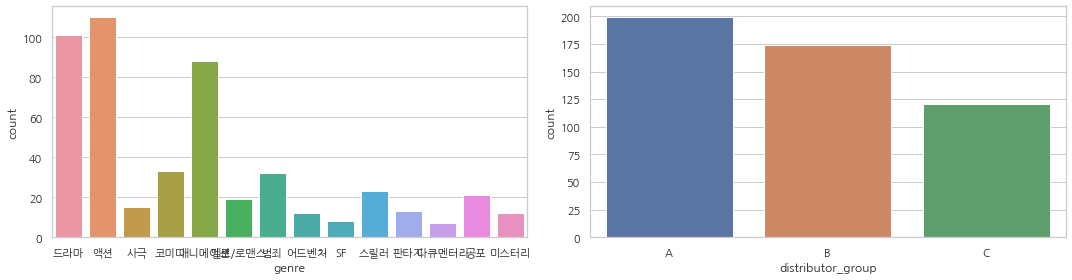

In [136]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
sns.countplot(x=df12[df12['day'] == '수']['genre'], data=df12)

plt.subplot(122)
sns.countplot(x=df12[df12['day'] == '수']['distributor_group'], data=df12)
plt.tight_layout()
plt.show()

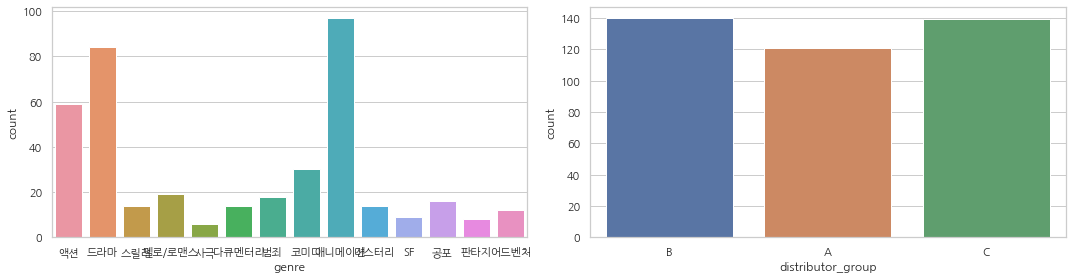

In [135]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
sns.countplot(x=df12[df12['day'] == '목']['genre'], data=df12)

plt.subplot(122)
sns.countplot(x=df12[df12['day'] == '목']['distributor_group'], data=df12)
plt.tight_layout()
plt.show()

In [162]:
# 스파이더맨 : 미국개봉일 / 범죄도시 : 개천절 / 독전 : 석가탄신일 / 남한산성 : 개천절 / 미이라 : 현충일 / 혹성탈출 : 광복절
# 알라딘 : / 이미테이션게임 : / 에이리언 : 대통령선거 / 범블비 : 크리스마스 / 챔피언 : / 캣츠 : 크리스마스이브 / 
# 스타이즈본 : 한글날/ 넛잡2 : 개천절 / 점박이 : 크리스마스 / 석조저택살인사건 : 대통령선거 / 투루스오어데어 : 석가탄신일/
# 목소리의 형태 : 대통령선거 / 딥: 개천절 / 언니: 신정 / 눈의여왕4 : 크리스마스이브 / 미드웨이 : 마지막날
# 프린스코기 : 크리스마스이브 / 사일런스 : / 드래곤스펠 : 광복절 / 다이노어드벤처 : 한글날
df12_Tues = df12[df12['day'] == '화'][['title', 'distributor_group', 'release_date', 'nation', 'screen', 'aud_nationwide', 'genre', 'rate', 'expert_rating', 'rating_audiences', 'director_power', 'actor_power', 'before_news', 'after_news']]
df12_Tues.sort_values(by='aud_nationwide', ascending=False)


,title,distributor_group,release_date,nation,screen,aud_nationwide,genre,rate,expert_rating,rating_audiences,director_power,actor_power,before_news,after_news
835,스파이더맨: 파 프롬 홈,B,7/2/2019,미국,2142,8020208,액션,12세이상관람가,6.56,1645,7257973,41844880,1924.0,1375.0
473,범죄도시,A,10/3/2017,한국,1315,6851297,범죄,청소년관람불가,6.00,2104,0,33367071,452.0,1023.0
566,독전,A,5/22/2018,한국,1357,5043771,범죄,15세이상관람가,5.29,1303,351208,35620681,1199.0,664.0
480,남한산성,A,10/3/2017,한국,1229,3829891,사극,15세이상관람가,7.50,2131,8655360,39144835,813.0,1363.0
381,미이라,B,6/6/2017,미국,1257,3628949,액션,15세이상관람가,5.71,1207,0,13209563,92.0,356.0
485,혹성탈출: 종의 전쟁,B,8/15/2017,미국,1017,2050909,액션,12세이상관람가,7.75,1176,4002134,8766280,161.0,568.0
756,알리타: 배틀 엔젤,B,2/5/2019,미국,1043,1949372,액션,12세이상관람가,7.14,1190,0,348697,238.0,523.0
16,이미테이션 게임,A,2/17/2015,영국,541,1743774,드라마,15세이상관람가,7.25,604,1,10966878,66.0,674.0
400,에이리언: 커버넌트,B,5/9/2017,미국,841,1305826,SF,15세이상관람가,7.11,2096,6385989,12039745,126.0,369.0
679,범블비,A,12/25/2018,미국,1016,1167150,액션,12세이상관람가,6.78,943,30525,97406,161.0,715.0


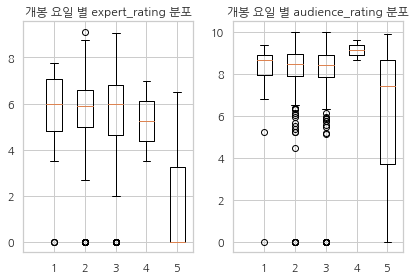

In [161]:
# 요일별로 expert_rating, audience_rating 박스플랏 그려보기
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot([df12[df12['day'] == '화']['expert_rating'], df12[df12['day'] == '수']['expert_rating'], 
            df12[df12['day'] == '목']['expert_rating'], df12[df12['day'] == '금']['expert_rating'], 
            df12[df12['day'] == '토']['expert_rating']])
ax1.set_xticks(range(6), ['', '화', '수', '목', '금', '토'])
ax1.set_title("개봉 요일 별 expert_rating 분포")

ax2.boxplot([df12[df12['day'] == '화']['audience_rating'], df12[df12['day'] == '수']['audience_rating'], 
            df12[df12['day'] == '목']['audience_rating'], df12[df12['day'] == '금']['audience_rating'], 
            df12[df12['day'] == '토']['audience_rating']])
ax2.set_xticks(range(6), ['', '화', '수', '목', '금', '토'])
ax2.set_title("개봉 요일 별 audience_rating 분포")
plt.tight_layout()
plt.show()

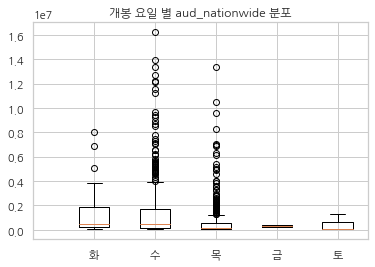

In [163]:
# 개봉요일별 aud_nationwide 박스플랏 그려보기
fig, ax = plt.subplots()
ax.boxplot([df12[df12['day'] == '화']['aud_nationwide'], df12[df12['day'] == '수']['aud_nationwide'], 
            df12[df12['day'] == '목']['aud_nationwide'], df12[df12['day'] == '금']['aud_nationwide'], 
            df12[df12['day'] == '토']['aud_nationwide']])
plt.title("개봉 요일 별 aud_nationwide 분포")
plt.xticks(range(6), ['', '화', '수', '목', '금', '토'])
plt.show()

In [139]:
df12.columns

Index(['title', 'director', 'distributor', 'distributor_group', 'release_date',
       'release_season', 'release', 'form', 'nation', 'screen',
       'rev_nationwide', 'aud_nationwide', 'rev_seoul', 'rev_seoul.1', 'genre',
       'rate', 'type', 'expert_rating', 'starring_actors', 'running_times',
       'audience_rating', 'rating_audiences', 'realease_year',
       'director_power', 'sequel', 'original', 'actor_power', 'director_count',
       'director_movie_count', 'actor_movie_count', 'log_aud', 'before_news',
       'after_news', 'day', 'count'],
      dtype='object')